Training data size: 317
Testing data size: 80


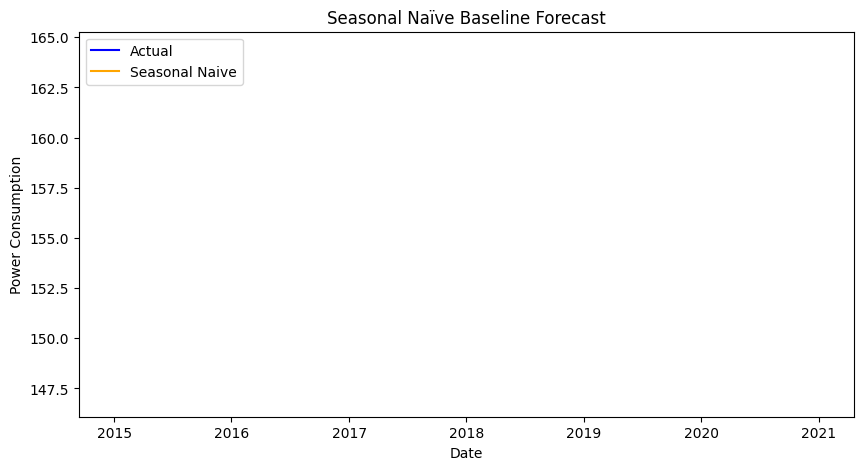

Seasonal Naive MAE: 6.253199999999997


In [1]:
# ---------------------------------------
# Suppress warnings
# ---------------------------------------
import warnings
warnings.filterwarnings("ignore")

# ---------------------------------------
# Imports
# ---------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# ---------------------------------------
# Load Dataset
# ---------------------------------------
df = pd.read_csv(
    "ML471_S4_Datafile_Concept.csv",
    parse_dates=['Datetime']
)

df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)
df = df.asfreq('MS')   # Monthly frequency

# ---------------------------------------
# Train-Test Split (80–20)
# ---------------------------------------
y = df['Consumption']

split = int(len(y) * 0.8)
train = y.iloc[:split]
test = y.iloc[split:]

print(f"Training data size: {len(train)}")
print(f"Testing data size: {len(test)}")

# ---------------------------------------
# 1. Seasonal Naïve Forecast
# ---------------------------------------
seasonal_period = 12

# Shift by 12 months
seasonal_naive_forecast = y.shift(seasonal_period)

# Align forecast with test period
seasonal_naive_test = seasonal_naive_forecast.loc[test.index]

# ---------------------------------------
# 2. Visualization (MATCHES SAMPLE)
# ---------------------------------------
plt.figure(figsize=(10, 5))

plt.plot(test.index, test.values,
         label='Actual', color='blue')

plt.plot(seasonal_naive_test.index, seasonal_naive_test.values,
         label='Seasonal Naive', color='orange')

plt.xlabel("Date")
plt.ylabel("Power Consumption")
plt.title("Seasonal Naïve Baseline Forecast")
plt.legend()
plt.grid(False)

plt.show()

# ---------------------------------------
# 3. Evaluation using MAE
# ---------------------------------------
# Drop NaNs before evaluation
eval_df = pd.concat([test, seasonal_naive_test], axis=1)
eval_df.columns = ['Actual', 'Seasonal_Naive']
eval_df = eval_df.dropna()

mae = mean_absolute_error(eval_df['Actual'], eval_df['Seasonal_Naive'])

print(f"Seasonal Naive MAE: {mae}")
